In [1]:
import numpy as np
import gudhi
import matplotlib.pyplot as plt

Questão 54

In [4]:
#Ler o arquivo
file = 'Cy8.txt'
readfile = open(file).read()
X = np.asarray([[float(a) for a in item.split()] for item in readfile.split('\n')[:-1]])

<AxesSubplot:title={'center':'Persistence diagram'}, xlabel='Birth', ylabel='Death'>

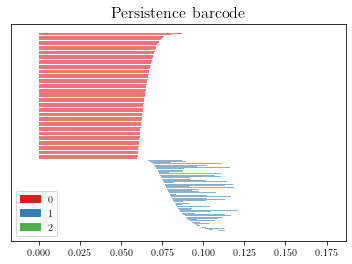

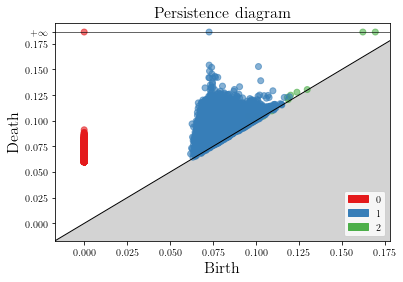

In [12]:
#Criando complexo de rips e calculando os pares de persistencia
rips = gudhi.RipsComplex(points=X/2, max_edge_length=0.3)
complex = rips.create_simplex_tree(max_dimension=3)
persistence = complex.persistence(homology_coeff_field=2)

#Plot do codigo de barras e do diagrama de persistencia
gudhi.plot_persistence_barcode(persistence)
gudhi.plot_persistence_diagram(persistence)


Questão 55

Farei primeiro um exemplo e depois farei o que a questão pede(média em varias amostragens)

In [3]:
#Função para fazer a imersão dos dados em R2
def TimeDelayEmbedding(x,edim,delay=1):
    """time delay embedding of a d-dim times series into R^{d*edim}
    the time series is assumed to be periodic
    parameters:
        + x: a list of d lists of same length L or a dxL numpy array
        + edim: the number of points taken to build the embedding in R^{d*edim}
        + delay: embeeding given by (x[i],x[i+delay],...,x[i + (edim-1)*delay])
            Default value for delay is 1
    """
    ts = np.asarray(x)
    if len(np.shape(ts)) == 1:
        ts = np.reshape(ts,(1,ts.shape[0]))
    ts_d = ts.shape[0]
    ts_length = ts.shape[1]
    output = ts
    for i in range(edim-1):
        output = np.concatenate((output,np.roll(ts,-(i+1)*delay,axis=1)),axis=0)
    return output

In [6]:
#Ler dados
flauta = np.genfromtxt('flute.csv', delimiter=',')
clarinete = np.genfromtxt('clarinet.csv', delimiter=',')
print(len(flauta))
print(len(clarinete))

38000
96000


In [46]:
#Criando amostras de 500 pontos
len_amostra=500
i = np.random.randint(0,len(flauta)-len_amostra)
amostra_flauta = flauta[i:i+len_amostra]

i = np.random.randint(0,len(clarinete)-len_amostra)
amostra_clarinete = clarinete[i:i+len_amostra]

#Imersão em R2
flauta_R2 = TimeDelayEmbedding(amostra_flauta,edim=2,delay=2).reshape((500,2))
clarinete_R2 = TimeDelayEmbedding(amostra_clarinete,edim=2,delay=2).reshape((500,2))

print(np.shape(flauta_R2))

(500, 2)


In [47]:
#Complexos de Rips e pares de persistencia
rips_flauta = gudhi.RipsComplex(points=flauta_R2,max_edge_length=0.2)
rips_clarinete = gudhi.RipsComplex(points=clarinete_R2,max_edge_length=0.2)

complexo_flauta = rips_flauta.create_simplex_tree(max_dimension=2)
complexo_clarinete = rips_clarinete.create_simplex_tree(max_dimension=2)

pers_flauta = complexo_flauta.persistence(homology_coeff_field=2)
pers_clarinete = complexo_clarinete.persistence(homology_coeff_field=2)

<AxesSubplot:title={'center':'Persistence diagram'}, xlabel='Birth', ylabel='Death'>

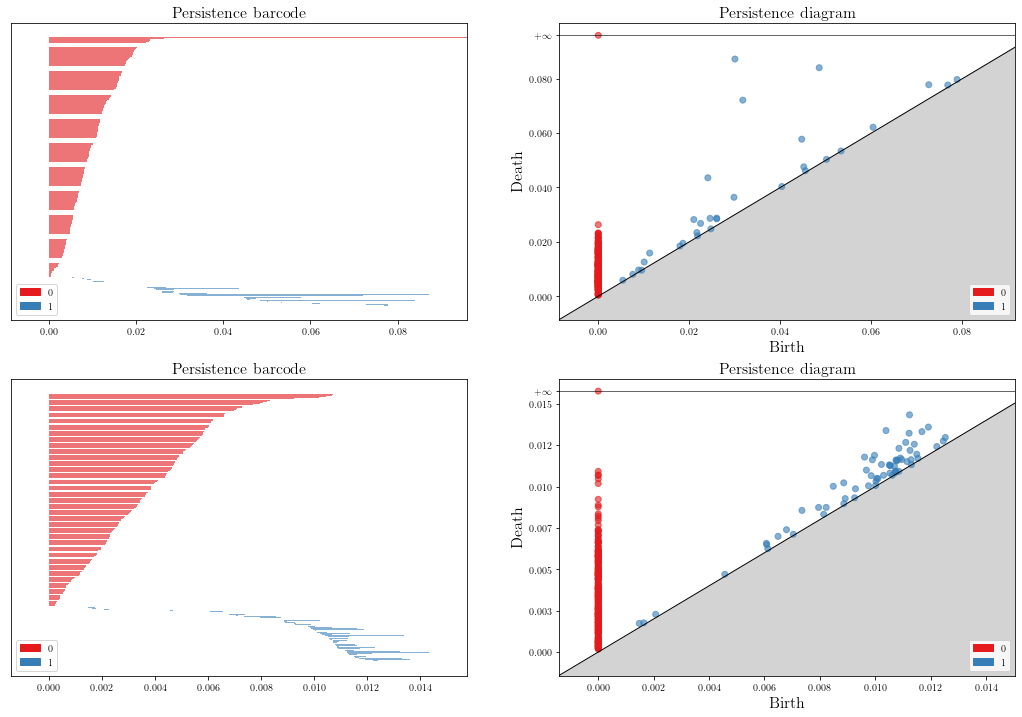

In [48]:
#Plot dos códigos de barras e diagramas de persistencia
fig = plt.figure(figsize=(18,12))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

gudhi.plot_persistence_barcode(pers_flauta, axes=ax1)
gudhi.plot_persistence_diagram(pers_flauta, axes=ax2)
gudhi.plot_persistence_barcode(pers_clarinete, axes=ax3)
gudhi.plot_persistence_diagram(pers_clarinete, axes=ax4)

In [49]:
#Complexos de Rips e pares de persistencia(ciclos com persistencia maior que 0.03)
rips_flauta = gudhi.RipsComplex(points=flauta_R2,max_edge_length=0.2)
rips_clarinete = gudhi.RipsComplex(points=clarinete_R2,max_edge_length=0.2)

complexo_flauta = rips_flauta.create_simplex_tree(max_dimension=2)
complexo_clarinete = rips_clarinete.create_simplex_tree(max_dimension=2)

pers_flauta = complexo_flauta.persistence(homology_coeff_field=2, min_persistence=0.03)
pers_clarinete = complexo_clarinete.persistence(homology_coeff_field=2,min_persistence=0.03)

<AxesSubplot:title={'center':'Persistence diagram'}, xlabel='Birth', ylabel='Death'>

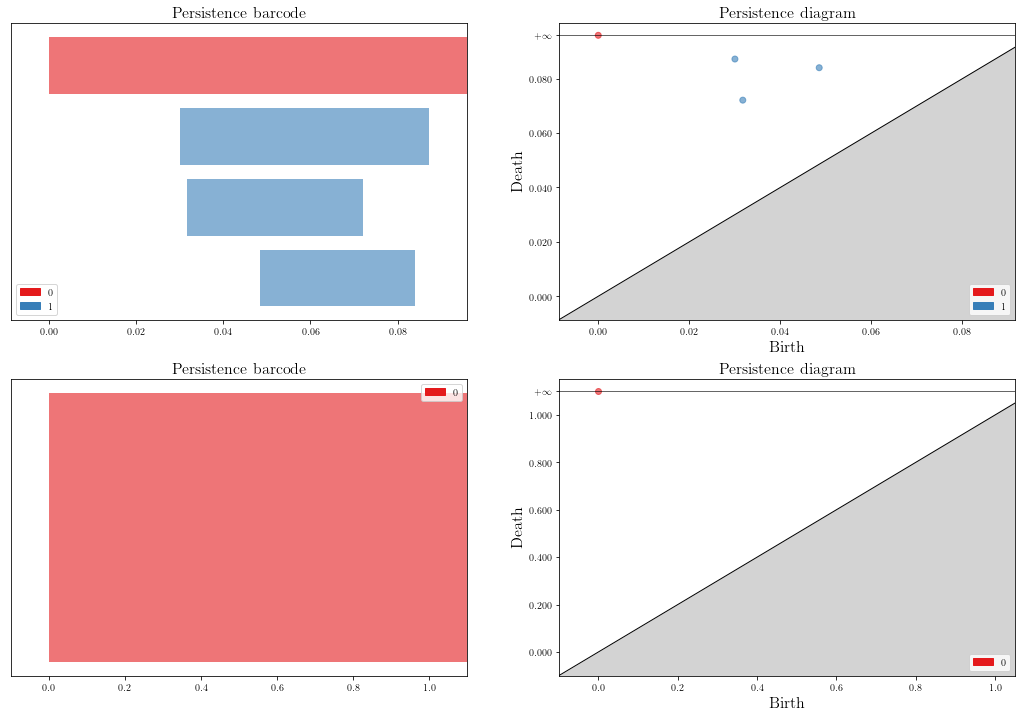

In [50]:
#Plot dos códigos de barras e diagramas de persistencia(ciclos com persistencia maior que 0.03)
fig = plt.figure(figsize=(18,12))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

gudhi.plot_persistence_barcode(pers_flauta, axes=ax1)
gudhi.plot_persistence_diagram(pers_flauta, axes=ax2)
gudhi.plot_persistence_barcode(pers_clarinete, axes=ax3)
gudhi.plot_persistence_diagram(pers_clarinete, axes=ax4)

In [51]:
#Número de ciclos de dim 1 com persistencia maior que 0.03
ciclos_persistentes_flauta = []
ciclos_persistentes_clarinete = []

f,c = 0,0
for i in range(len(pers_flauta)):
    if pers_flauta[i][0]==1:
        f+=1
for i in range(len(pers_clarinete)):
    if pers_clarinete[i][0]==1:
        c+=1

ciclos_persistentes_flauta.append(f)
ciclos_persistentes_clarinete.append(c)

print(ciclos_persistentes_flauta)
print(ciclos_persistentes_clarinete)

[3]
[0]


Agora o que é pedido na questão

In [55]:
n_amostras = 10
len_amostra=500

ciclos_persistentes_flauta = []
ciclos_persistentes_clarinete = []

for _ in range(n_amostras):

    #Criando amostras de 500 pontos consecutivos
    i = np.random.randint(0,len(flauta)-len_amostra)
    amostra_flauta = flauta[i:i+len_amostra]
    
    i = np.random.randint(0,len(clarinete)-len_amostra)
    amostra_clarinete = clarinete[i:i+len_amostra]
    
    #Imersão em R2
    flauta_R2 = TimeDelayEmbedding(amostra_flauta,edim=2,delay=2).reshape((500,2))
    clarinete_R2 = TimeDelayEmbedding(amostra_clarinete,edim=2,delay=2).reshape((500,2))


    #Complexos de Rips e pares de persistencia(ciclos com persistencia maior que 0.03)
    rips_flauta = gudhi.RipsComplex(points=flauta_R2,max_edge_length=0.2)
    rips_clarinete = gudhi.RipsComplex(points=clarinete_R2,max_edge_length=0.2)
    
    complexo_flauta = rips_flauta.create_simplex_tree(max_dimension=2)
    complexo_clarinete = rips_clarinete.create_simplex_tree(max_dimension=2)
    
    pers_flauta = complexo_flauta.persistence(homology_coeff_field=2, min_persistence=0.03)
    pers_clarinete = complexo_clarinete.persistence(homology_coeff_field=2,min_persistence=0.03)
    

    #Número de ciclos de dim 1 com persistencia maior que 0.03
    
    f,c = 0,0
    for i in range(len(pers_flauta)):
        if pers_flauta[i][0]==1:
            f+=1
    for i in range(len(pers_clarinete)):
        if pers_clarinete[i][0]==1:
            c+=1
    
    ciclos_persistentes_flauta.append(f)
    ciclos_persistentes_clarinete.append(c)

print(ciclos_persistentes_flauta)
print(ciclos_persistentes_clarinete)

[0, 0, 0, 0, 1, 2, 0, 1, 2, 1]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [56]:
#Média do número de ciclos persistentes
print('Média de ciclos persistentes para a flauta:',np.mean(ciclos_persistentes_flauta))
print('Média de ciclos persistentes para a clarinete:',np.mean(ciclos_persistentes_clarinete))

Média de ciclos persistentes para a flauta: 0.7
Média de ciclos persistentes para a clarinete: 0.0


Questão 56

In [4]:
#Ler os dados
import pickle as pickle

file = open("acc.txt","rb")
data = pickle.load(file,encoding="latin1")
file.close()

data_A = data[0]
data_B = data[1]
data_C = data[2]

print(np.shape(data_A))

(100, 200, 3)


<AxesSubplot:title={'center':'Persistence diagram'}, xlabel='Birth', ylabel='Death'>

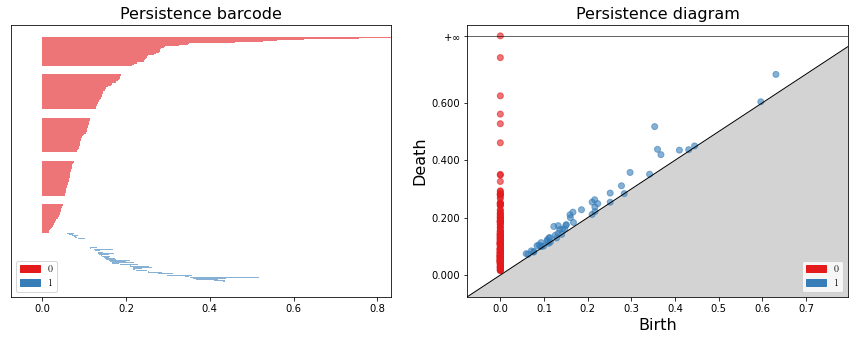

In [5]:
#Exemplo

a = data_A[0].reshape((200,3))
t = TimeDelayEmbedding(a,edim=2,delay=3)

rips = gudhi.RipsComplex(points=t,max_edge_length=0.8)
st = rips.create_simplex_tree(max_dimension=2)
pers = st.persistence(homology_coeff_field=2)

fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

gudhi.plot_persistence_barcode(pers,axes=ax1)
gudhi.plot_persistence_diagram(pers,axes=ax2)



In [ ]:
#Pessoa A
H1_A = []
for i in range(100):
    data = data_A[i].reshape((200,3))
    embedding = TimeDelayEmbedding(data,edim=2,delay=3)
    
    rips = gudhi.RipsComplex(points=embedding,max_edge_length=0.6)
    st = rips.create_simplex_tree(max_dimension=2)
    pers = st.persistence(homology_coeff_field=2)
    pers1 = st.persistence_intervals_in_dimension(1)

    H1_A.append(pers1)
    print(i)
   

print(H1_A)


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
[array([[0.06337198, 0.07209086],
       [0.05916434, 0.07455567],
       [0.07615867, 0.07993457],
       [0.07672703, 0.08193426],
       [0.07084607, 0.08428572],
       [0.09189652, 0.09920121],
       [0.09485946, 0.10060769],
       [0.09920507, 0.10099712],
       [0.08391885, 0.10201861],
       [0.08829511, 0.10505889],
       [0.11062083, 0.110804  ],
       [0.09341   , 0.11296062],
       [0.11460828, 0.11518178],
       [0.10735993, 0.11814448],
       [0.10735497, 0.12271829],
       [0.12891367, 0.12921133],
       [0.11155107, 0.1294615 ],
       [0.11303017, 0.13041471],
       [0.12574441, 0.13836286],
       [0.14039535, 0.14176329],
       [0.1322267 , 0.14531152],
       [0.136088

In [7]:
#Pessoa B
H1_B = []
for i in range(100):
    data = data_B[i].reshape((200,3))
    embedding = TimeDelayEmbedding(data,edim=2,delay=3)
    
    rips = gudhi.RipsComplex(points=embedding,max_edge_length=0.6)
    st = rips.create_simplex_tree(max_dimension=2)
    pers = st.persistence(homology_coeff_field=2)
    pers1 = st.persistence_intervals_in_dimension(1)

    H1_B.append(pers1)
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


In [8]:
#Pessoa C
H1_C = []
for i in range(100):
    data = data_C[i].reshape((200,3))
    embedding = TimeDelayEmbedding(data,edim=2,delay=3)
    
    rips = gudhi.RipsComplex(points=embedding,max_edge_length=0.6)
    st = rips.create_simplex_tree(max_dimension=2)
    pers = st.persistence(homology_coeff_field=2)
    pers1 = st.persistence_intervals_in_dimension(1)

    H1_C.append(pers1)
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


In [ ]:
#Matrizes de distancias de gargalo  (Coloco para 1 quando é infinito pq com infinito não roda no mds)

#Pessoa A
Dist_A = np.zeros((len(H1_A),len(H1_A)))
for i in range(len(H1_A)):
    for j in range(len(H1_A)):
        db = gudhi.bottleneck_distance(H1_A[i],H1_A[j])
        if db<1:
            Dist_A[i,j] = db
        else:
            Dist_A[i,j]=1

#Pessoa B
Dist_B = np.zeros((len(H1_B),len(H1_B)))
for i in range(len(H1_B)):
    for j in range(len(H1_B)):
        db = gudhi.bottleneck_distance(H1_B[i],H1_B[j])
        if db<1:
            Dist_B[i,j] = db
        else:
            Dist_B[i,j]=1


#Pessoa C
Dist_C = np.zeros((len(H1_C),len(H1_C)))
for i in range(len(H1_C)):
    for j in range(len(H1_C)):
        db = gudhi.bottleneck_distance(H1_C[i],H1_C[j])
        if db<1:
            Dist_C[i,j] = db
        else:
            Dist_C[i,j]=1

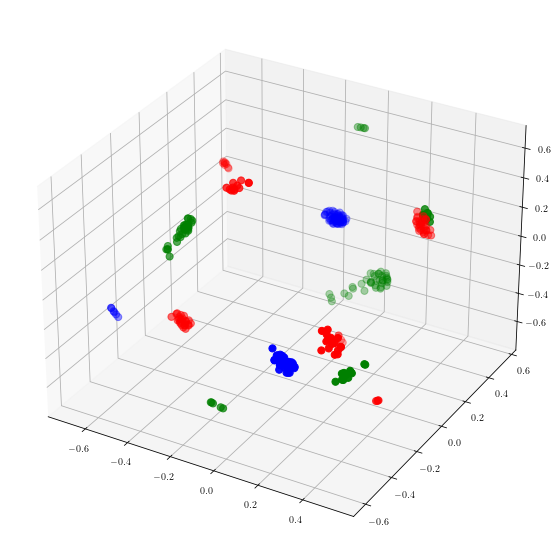

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

In [ ]:
#Representação em R3 com o MDS
from sklearn import manifold

#Pessoa A
mds = manifold.MDS(n_components=3, max_iter=3000, eps=1e-9, dissimilarity="precomputed", n_jobs=1)
pos = mds.fit(Dist_A).embedding_
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(projection='3d')

ax.scatter(pos[:,0], pos[:, 1], pos[:,2], s=50, color='blue')

#Pessoa B
mds = manifold.MDS(n_components=3, max_iter=3000, eps=1e-9, dissimilarity="precomputed", n_jobs=1)
pos = mds.fit(Dist_B).embedding_
fig = plt.figure(figsize = (10,10))


ax.scatter(pos[:,0], pos[:, 1], pos[:,2], s=50, color='green')

#Pessoa C
mds = manifold.MDS(n_components=3, max_iter=3000, eps=1e-9, dissimilarity="precomputed", n_jobs=1)
pos = mds.fit(Dist_C).embedding_
fig = plt.figure(figsize = (10,10))


ax.scatter(pos[:,0], pos[:, 1], pos[:,2], s=50, color='red')